In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os

sns.set_theme(style="whitegrid")
df = pd.read_csv("netflix_titles.csv")
os.makedirs("grafikler", exist_ok=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Distribution of Movies vs TV Shows

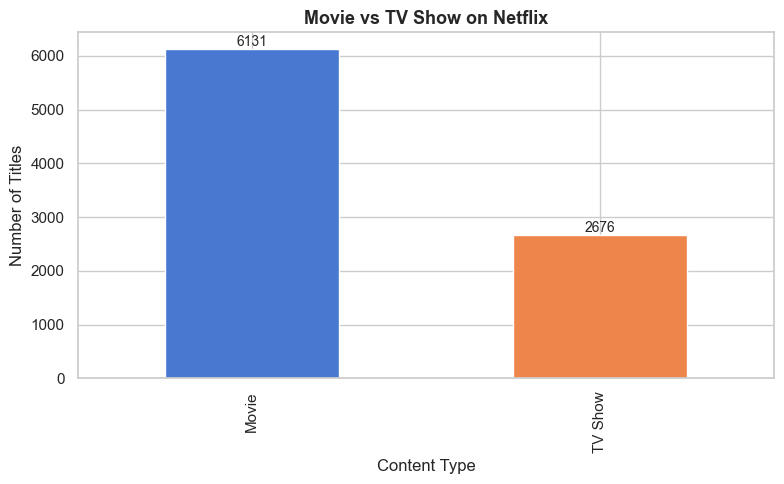

In [19]:
counts = df['type'].value_counts()
colors = sns.color_palette("muted", len(counts))

ax = counts.plot(kind='bar', color=colors, figsize=(8,5))

for i, val in enumerate(counts.values):
    ax.text(i, val + 50, str(val), ha='center', fontsize=10)

plt.title("Movie vs TV Show on Netflix", fontsize=13, weight='bold')
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.savefig("grafikler/film_vs_dizi.png", dpi=300, bbox_inches='tight')
plt.show()

Top 10 Most Common Content Genres

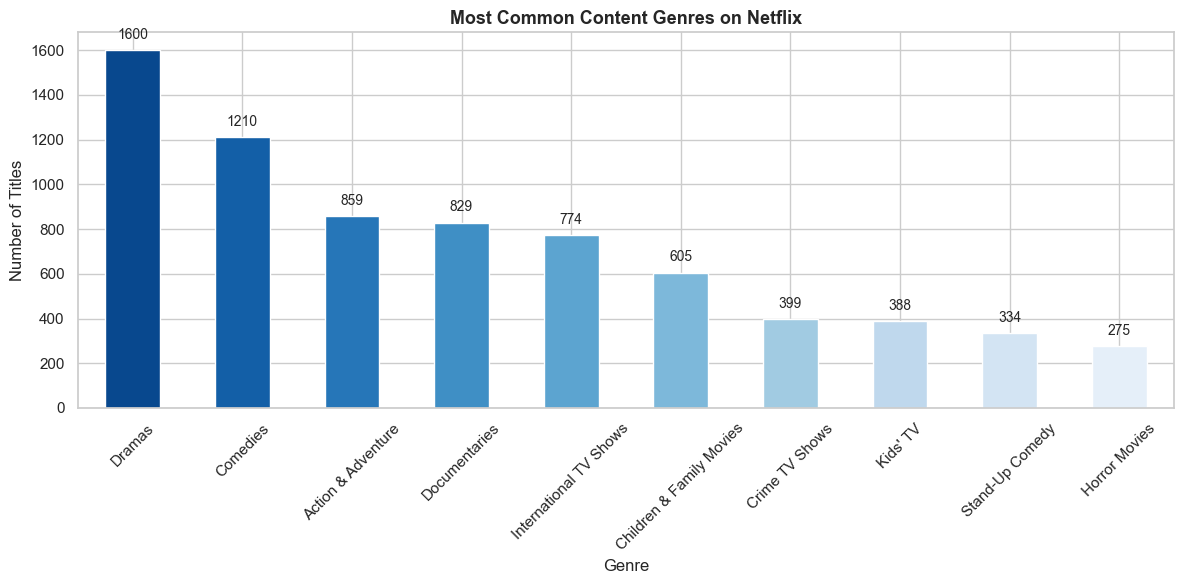

In [20]:
df['main_genre'] = df['listed_in'].str.split(',').str[0]

counts = df['main_genre'].value_counts().head(10)
colors = sns.color_palette("Blues", len(counts))[::-1]

ax = counts.plot(kind='bar', color=colors, figsize=(12,6))

for i, val in enumerate(counts.values):
    ax.text(i, val + 50, str(val), ha='center', fontsize=10)

plt.title("Most Common Content Genres on Netflix", fontsize=13, weight='bold')
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("grafikler/turler.png", dpi=300, bbox_inches='tight')
plt.show()

Top 10 Content-Producing Countries

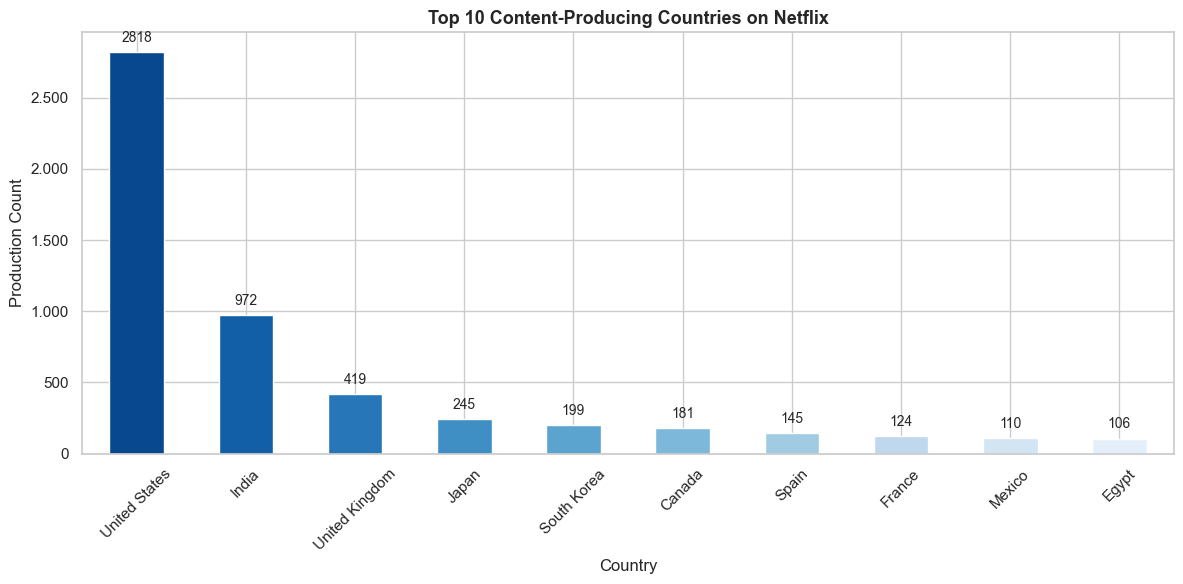

In [23]:
counts = df['country'].dropna().value_counts().head(10)
colors = sns.color_palette("Blues", len(counts))[::-1]

ax = counts.plot(kind='bar', color=colors, figsize=(12,6))

for i, val in enumerate(counts.values):
    ax.text(i, val + 50, str(val), ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Content-Producing Countries on Netflix", fontsize=13, weight='bold')
plt.xlabel("Country")
plt.ylabel("Production Count")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", ".")))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("grafikler/ulkelere_gore.png", dpi=300, bbox_inches='tight')
plt.show()

Number of Titles by Release Year

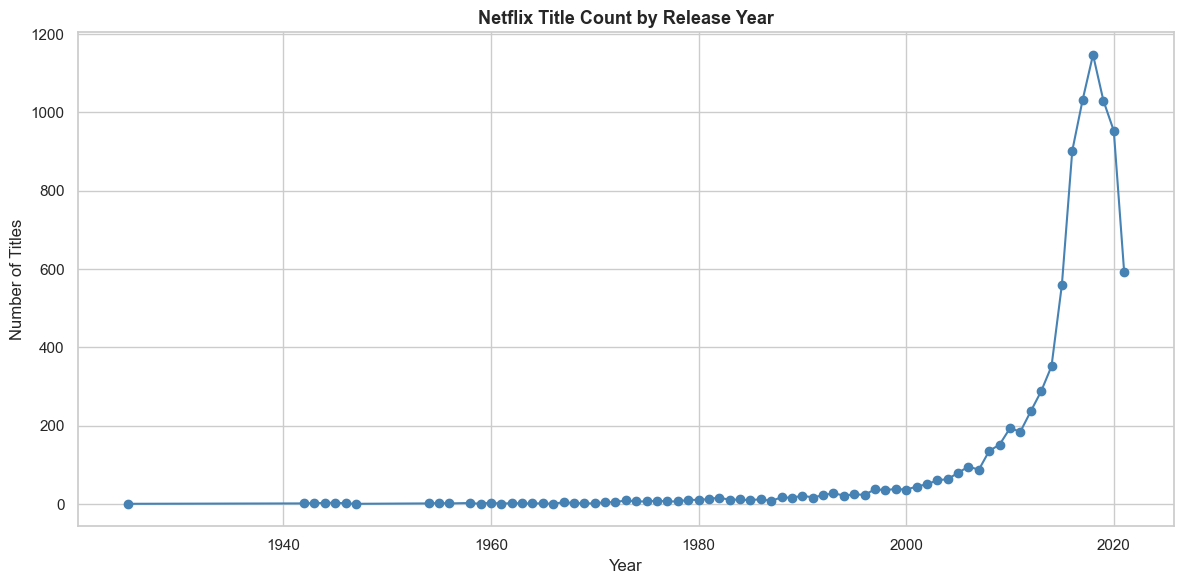

In [22]:
counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(counts.index, counts.values, marker='o', color='steelblue')

plt.title("Netflix Title Count by Release Year", fontsize=13, weight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.savefig("grafikler/yillara_gore.png", dpi=300, bbox_inches='tight')
plt.show()